<a href="https://colab.research.google.com/github/Datalincy/EDA/blob/main/lincy_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd  # Make sure pd refers to the pandas module
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# LOAD DATASET
df = pd.read_csv('/content/X Coop 2.csv')

In [ ]:
# Understanding the dataset
df.head() # Display the first 5 rows

,Cooperative name,Farmer Membership ID,Has farmer photo in the field,Has signed privacy document,Cooperative membership number,Age,Gender,Land size (acres),Number of trees,Coffee variety,...,rates 2022,rates 2023,rates 2024,rates 2025,Rates 2026,Rates 2027,Rates 2028,georeferences,Has Data correctness declaration document,Remarks
0,XXXXX Cooperative,616.0,Yes,Yes,616.0,36-55,Male,1.00,500.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Farmer took a photo
1,XXXXX Cooperative,2260.0,Yes,Yes,2260.0,56-70,Male,2.00,1000.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Farmer refused to take a photograph in the farm
2,XXXXX Cooperative,3830.0,Yes,Yes,3830.0,36-55,Male,0.25,155.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Small scale client
3,XXXXX Cooperative,501.0,Yes,Yes,501.0,36-55,Female,0.25,100.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Small scale and cooperative
4,XXXXX Cooperative,501.0,Yes,Yes,501.0,56-70,Female,1.00,200.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Farmer took a photo


In [ ]:
df.tail()# Display the last 5 rows

,Cooperative name,Farmer Membership ID,Has farmer photo in the field,Has signed privacy document,Cooperative membership number,Age,Gender,Land size (acres),Number of trees,Coffee variety,...,rates 2022,rates 2023,rates 2024,rates 2025,Rates 2026,Rates 2027,Rates 2028,georeferences,Has Data correctness declaration document,Remarks
2168,XXXXX Cooperative,NaN,No,Yes,NaN,56-70,Female,0.5,600.0,Ruiru 11,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Small scale farmer and she is so busy to her w...
2169,XXXXX Cooperative,NaN,Yes,No,NaN,18-35,Male,0.5,272.0,"Ruiru 11,SL",...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,The farmer inherited his father's coffee plant...
2170,XXXXX Cooperative,NaN,Yes,Yes,NaN,36-55,Male,0.5,200.0,Ruiru 11,...,8200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Small scale farmer
2171,XXXXX Cooperative,NaN,Yes,No,NaN,NaN,Female,0.5,NaN,"Ruiru 11,Batian",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
2172,XXXXX Cooperative,NaN,No,Yes,NaN,36-55,Female,1.0,100.0,SL,...,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Farmer refused to take photo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 45 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Cooperative name                                                   2173 non-null   object 
 1   Farmer Membership ID                                               2166 non-null   float64
 2   Has farmer photo in the field                                      2173 non-null   object 
 3   Has signed privacy document                                        2173 non-null   object 
 4   Cooperative membership number                                      2166 non-null   float64
 5   Age                                                                2119 non-null   object 
 6   Gender                                                             2173 non-null   object 
 7   Land size (acres)       

In [ ]:
# Handling missing values
df.isnull().sum()

,0
Cooperative name,0
Farmer Membership ID,7
Has farmer photo in the field,0
Has signed privacy document,0
Cooperative membership number,7
Age,54
Gender,0
Land size (acres),0
Number of trees,9
Coffee variety,12


In [ ]:
# Handling duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
# print the actual column names in the Dataframe
print (df.columns)

Index(['Cooperative name', 'Farmer Membership ID',
       'Has farmer photo in the field', 'Has signed privacy document',
       'Cooperative membership number', 'Age', 'Gender', 'Land size (acres)',
       'Number of trees', 'Coffee variety', 'Number of dependants',
       'Push & Pull farming Technique: is intercroppped with other crops?',
       'Which Crop', 'Source of income', 'Highest education', 'kgs 2020',
       'kgs 2021', 'kgs 2022', 'kgs 2023', 'kgs 2024', 'kgs 2025', 'Kgs 2026',
       'Kgs 2027', 'Kgs 2028', 'payments 2020', 'payments 2021',
       'payments 2022', 'payments 2023', 'payments 2024', 'payments 2025',
       'Payments 2026', 'Payments 2027', 'Payments 2028', 'rates 2020',
       'rates 2021', 'rates 2022', 'rates 2023', 'rates 2024', 'rates 2025',
       'Rates 2026', 'Rates 2027', 'Rates 2028', 'georeferences',
       'Has Data correctness declaration document', 'Remarks'],
      dtype='object')


In [ ]:
# select one feature for simple linear regression
X = df[['Land size (acres)']].values # Changing the column to match df.columns
Y = df[['Number of trees']].values #target, Changing the column to match df.columns

In [ ]:
# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
Y_train

array([[350.],
       [300.],
       [493.],
       ...,
       [115.],
       [180.],
       [ nan]])

In [ ]:
X_train

,0
0,0.25
1,0.50
2,0.50
3,2.00
4,0.50
...,...
1732,1.00
1733,0.11
1734,0.20
1735,0.25


In [ ]:
# Create and train model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"coefficient: {model.coef_[0]}")

Intercept: 130.1170924214262
coefficient: 452.38879794135283


In [ ]:
# predict
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([ 243.21429191,  243.21429191,  243.21429191,  243.21429191,
        582.50589036,  311.0726116 ,  582.50589036,  356.31149139,
        356.31149139, 1034.8946883 ,  243.21429191, 1034.8946883 ,
        356.31149139,  582.50589036,  243.21429191,  243.21429191,
        356.31149139,  243.21429191,  356.31149139,  469.40869088,
        243.21429191,  243.21429191,  401.55037119,  582.50589036,
        582.50589036,  311.0726116 ,  356.31149139,  582.50589036,
        356.31149139,  356.31149139,  243.21429191,  356.31149139,
        537.26701057,  243.21429191,  582.50589036,  356.31149139,
        243.21429191,  356.31149139,  243.21429191,  356.31149139,
        265.8337318 ,  356.31149139,  197.97541211,  220.59485201,
        356.31149139,  243.21429191,  356.31149139,  243.21429191,
        582.50589036,  582.50589036,  311.0726116 ,  243.21429191,
        243.21429191,  356.31149139,  356.31149139,  582.50589036,
        582.50589036,  311.0726116 ,  582.50589036,  265.83373

In [ ]:
X_test

array([[0.25      ],
       [0.25      ],
       [0.25      ],
       [0.25      ],
       [1.        ],
       [0.4       ],
       [1.        ],
       [0.5       ],
       [0.5       ],
       [2.        ],
       [0.25      ],
       [2.        ],
       [0.5       ],
       [1.        ],
       [0.25      ],
       [0.25      ],
       [0.5       ],
       [0.25      ],
       [0.5       ],
       [0.75      ],
       [0.25      ],
       [0.25      ],
       [0.6       ],
       [1.        ],
       [1.        ],
       [0.4       ],
       [0.5       ],
       [1.        ],
       [0.5       ],
       [0.5       ],
       [0.25      ],
       [0.5       ],
       [0.9       ],
       [0.25      ],
       [1.        ],
       [0.5       ],
       [0.25      ],
       [0.5       ],
       [0.25      ],
       [0.5       ],
       [0.3       ],
       [0.5       ],
       [0.15      ],
       [0.2       ],
       [0.5       ],
       [0.25      ],
       [0.5       ],
       [0.25 

In [ ]:
 # Replace NaN values in Y_test and y_pred with the mean of the respective arrays(removing NaN values in my dataset)
Y_test = np.nan_to_num(Y_test, nan=np.nanmean(Y_test))
y_pred = np.nan_to_num(Y_pred, nan=np.nanmean(Y_pred))


# Evaluate model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [ ]:
# Model Evaluation
print(f"Mean Absoluter Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R_squared: {r2}")

Mean Absoluter Error: 156.823573316267
Mean Squared Error: 66749.09040825599
R_squared: 0.2604179721319264


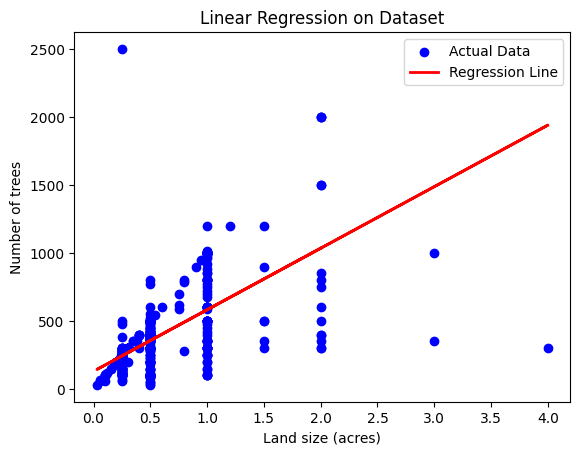

In [ ]:
# visualization
plt.scatter(X_test, Y_test ,color = 'blue', label = 'Actual Data')
plt.plot(X_test, y_pred, color = 'red', linewidth= 2,label = 'Regression Line')
plt.xlabel('Land size (acres)')
plt.ylabel('Number of trees')
plt.legend()
plt.title('Linear Regression on Dataset')
plt.show()

In [ ]:
# Function to predict the number of trees that can fit in a given land size (acres)
def predict_value(Land_size_acres_value):
    prediction = model.predict(np.array([[Land_size_acres_value]]))
    print(f"Predicted number of trees that can fit a given land size (acres) {Land_size_acres_value}: {prediction[0]}")
    return prediction[0]

# Example prediction
Land_size_acres_input = 20
predict_value(Land_size_acres_input)


Predicted number of trees that can fit a given land size (acres) 20: 9177.893051248482


np.float64(9177.893051248482)

In [ ]:
#Statistical methods for EDA
#3.1 KEY STATISTICS
print("Mean:",df['Land size (acres)'].mean()) #calculating and print the mean of the land size
print("variance:",df['Land size (acres)'].var()) #calculating and print the variance of land size
print("correlation Matrix:\n",df.select_dtypes(include=[np.number]).corr()) # filtering only numeric columns

Mean: 0.560243135450069
variance: 0.1778841874708498
correlation Matrix:
                                Farmer Membership ID  \
Farmer Membership ID                       1.000000   
Cooperative membership number              1.000000   
Land size (acres)                         -0.087338   
Number of trees                            0.050281   
Number of dependants                      -0.001589   
kgs 2020                                  -0.048351   
kgs 2021                                  -0.065080   
kgs 2022                                   0.027926   
kgs 2023                                        NaN   
kgs 2024                                        NaN   
kgs 2025                                        NaN   
Kgs 2026                                        NaN   
Kgs 2027                                        NaN   
Kgs 2028                                        NaN   
payments 2020                             -0.060524   
payments 2021                             -0.0

In [ ]:
t_stat, p_value = stats.ttest_ind(df[df['Coffee variety']=='Ruiru 11']['Land size (acres)'],df[df['Coffee variety']=='Ruiru 11,SL']['Land size (acres)']) #perfoming a t_test to compare means
print(f"t-test p-value:{p_value}") #printing the p_value from the t_test

t-test p-value:3.5588887456721536e-12


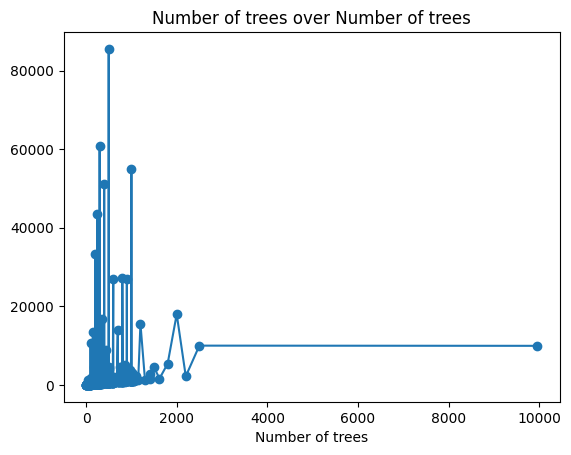

In [ ]:
#time series and spatial data analysis
#4.1 Time series analysis
ts_data = df.groupby('Number of trees')['Number of trees'].sum()
ts_data.plot(title='Number of trees over Number of trees', marker='o')
plt.show()#display the time series plot